In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pltp

In [2]:
# import cleaned datasets

data = pd.read_csv("../Data/yelp_restaurant_reviews.csv")

In [3]:
data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'attributes', 'categories', 'user_id',
       'review_stars', 'text', 'date'],
      dtype='object')

In [4]:
# drop columns not needed
to_drop = ['address', 'postal_code']
df = data.drop(to_drop, axis=1)

In [5]:
df.shape

(3566966, 13)

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(3551890, 13)

In [8]:
df['state'].value_counts()

NV     1172468
AZ     1010516
ON      471356
NC      235474
OH      197762
PA      175843
QC      120073
WI       78930
AB       53737
IL       23564
SC       12021
NY          91
NM          14
NE           8
XWY          8
AR           7
VT           5
CA           4
WA           3
CON          3
BC           3
Name: state, dtype: int64

In [9]:
df_ON = df[df['state'].str.contains('ON')]

In [47]:
csv_ON = "../Data/ON_reviews.csv"
df_ON.to_csv(csv_ON, index=False)

In [5]:
df_ON = pd.read_csv("../Data/ON_reviews.csv")

In [49]:
print(df_ON.shape)
df_ON.head(2)

(471359, 13)


,business_id,name,city,state,latitude,longitude,stars,attributes,categories,user_id,review_stars,text,date
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,43.605499,-79.652289,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",2K62MJ4CJ19L8Tp5pRfjfQ,3.0,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,43.605499,-79.652289,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",A0kENtCCoVT3m7T35zb2Vg,3.0,We've always been there on a Sunday so we were...,2013-06-24 23:11:30


In [7]:
review_counts = df_ON.groupby('business_id')['business_id'].count()

In [11]:
df_ON = df_ON.join(review_counts, on='business_id', rsuffix=' ', how='left')

In [12]:
df_ON.columns = ['business_id', 'name', 'city', 'state', 'stars', 'attributes', 'categories', 'user_id', 'review_stars', 'text', 'date', 'review_counts']

In [13]:
df_ON.head()

,business_id,name,city,state,stars,attributes,categories,user_id,review_stars,text,date,review_counts
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",2K62MJ4CJ19L8Tp5pRfjfQ,3.0,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30,134
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",A0kENtCCoVT3m7T35zb2Vg,3.0,We've always been there on a Sunday so we were...,2013-06-24 23:11:30,134
2,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",SuOLY03LW5ZcnynKhbTydA,3.0,"***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22,134
3,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",lymyUak6KNcNKoDbK87MiQ,1.0,"Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43,134
4,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",6vU0I5XgCv9OQHZ76rV6qw,4.0,One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55,134


In [14]:
ON_cities = df_ON['city'].value_counts().head(20)
ON_cities

Toronto          303058
Mississauga       35653
Markham           33280
Richmond Hill     16493
Scarborough       12548
North York        11943
Vaughan           11050
Brampton           8263
Etobicoke          7969
Thornhill          5772
Oakville           2996
Newmarket          2954
Pickering          2559
Ajax               2216
Whitby             1996
Woodbridge         1898
Aurora             1867
Unionville         1358
Concord            1113
East York           883
Name: city, dtype: int64

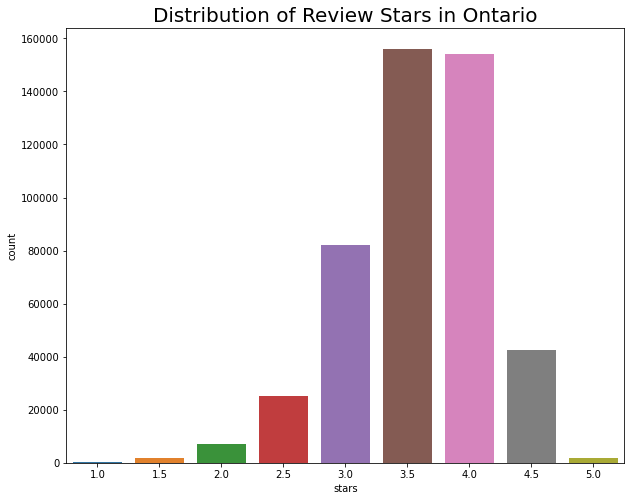

<Figure size 432x288 with 0 Axes>

In [20]:
pltp.subplots(figsize=(10,8))
sns.countplot(x=df_ON['stars'])
pltp.title('Distribution of Review Stars in Ontario', fontsize=20)
pltp.show()
pltp.savefig('../Images/ontario_review_stars.png')

In [21]:
df_ON['stars'].value_counts()

3.5    156139
4.0    154271
3.0     82209
4.5     42544
2.5     25104
2.0      7146
5.0      1910
1.5      1640
1.0       396
Name: stars, dtype: int64

In [29]:
most_reviewed = df_ON['name'].value_counts()[:10]
most_reviewed

Pai Northern Thai Kitchen    2177
Jack Astor's Bar & Grill     1664
Banh Mi Boys                 1636
KINTON RAMEN                 1542
McDonald's                   1538
Khao San Road                1467
KINKA IZAKAYA ORIGINAL       1425
Sansotei Ramen               1407
The Burger's Priest          1358
Burrito Boyz                 1268
Name: name, dtype: int64

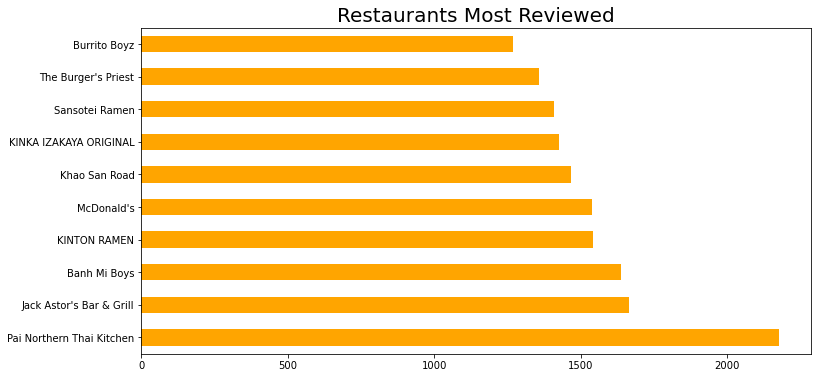

In [30]:
pltp.subplots(figsize=(12,6));
most_reviewed.plot(kind = 'barh', color= 'orange')
pltp.title('Restaurants Most Reviewed', fontsize=20);
pltp.savefig('../Images/most_reviewed.png')

In [14]:
GTA_Top5 = df_ON[df_ON['city'].str.contains('Toronto|Markham|Mississauga|Richmond Hill|Scarborough')]
GTA_Top5.shape

(401069, 12)

In [15]:
GTA_Top5['business_id'].nunique()

7283

In [16]:
GTA_most_reviewed = GTA_Top5['name'].value_counts()[0:10]
GTA_most_reviewed

Pai Northern Thai Kitchen       2177
Banh Mi Boys                    1636
Khao San Road                   1467
KINKA IZAKAYA ORIGINAL          1425
Jack Astor's Bar & Grill        1378
Sansotei Ramen                  1310
KINTON RAMEN                    1288
The Burger's Priest             1207
Seven Lives Tacos Y Mariscos    1183
Terroni                         1132
Name: name, dtype: int64

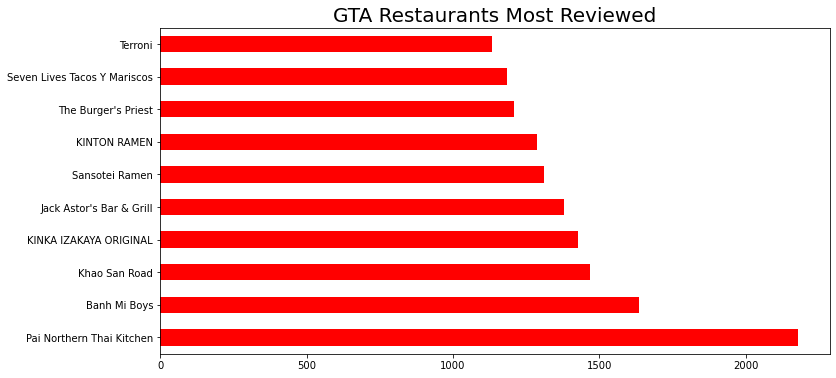

In [53]:
pltp.subplots(figsize=(12,6));
GTA_most_reviewed.plot(kind = 'barh', color= 'red')
pltp.title('GTA Restaurants Most Reviewed', fontsize=20);
pltp.savefig('../Images/GTA_most_reviewed.png')

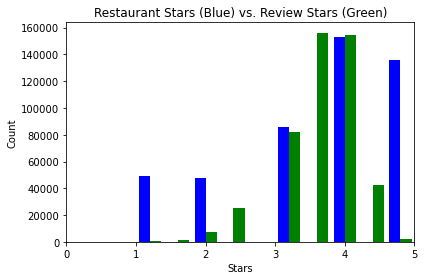

<Figure size 432x288 with 0 Axes>

In [35]:
y_s = df_ON['stars']
y_rs = df_ON['review_stars']
colors = ['b','g']

#plot the histogram
fig, ax = pltp.subplots()
ax.hist([y_rs,y_s],color=colors)
ax.set_xlim(0,5)
ax.set_xlabel("Stars")
ax.set_ylabel("Count")
pltp.title('Restaurant Stars (Blue) vs. Review Stars (Green)')
pltp.tight_layout()
pltp.show()
pltp.savefig('../Images/stars_comp.png')

In [17]:
GTA_Top5["text"].duplicated().value_counts()

False    400287
True        782
Name: text, dtype: int64

In [19]:
GTA_Top5.drop_duplicates(subset=['text'], inplace=True)

In [20]:
# Number of unique users in the GTA area

n_users = len(GTA_Top5.user_id.unique())
n_users 

94407

In [21]:
GTA_Top5['date'] = pd.to_datetime(GTA_Top5['date']).dt.date
GTA_Top5['date'] = pd.to_datetime(GTA_Top5['date']).dt.normalize()

/var/folders/3p/bdw7d11x76q9r29tng0s109c0000gn/T/ipykernel_2962/3417091841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GTA_Top5['date'] = pd.to_datetime(GTA_Top5['date']).dt.date
/var/folders/3p/bdw7d11x76q9r29tng0s109c0000gn/T/ipykernel_2962/3417091841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GTA_Top5['date'] = pd.to_datetime(GTA_Top5['date']).dt.normalize()


In [22]:
# extract year from date column and drop original date column
GTA_Top5[['year']] = pd.DataFrame(GTA_Top5.date.dt.year)

GTA_Top5.drop(['date'], axis =1, inplace = True)
GTA_Top5.head(2)

/Users/debragoei/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/debragoei/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_id,name,city,state,stars,attributes,categories,user_id,review_stars,text,review_counts,year
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",2K62MJ4CJ19L8Tp5pRfjfQ,3.0,My girlfriend and I went for dinner at Emerald...,134,2017
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",A0kENtCCoVT3m7T35zb2Vg,3.0,We've always been there on a Sunday so we were...,134,2013


In [23]:
reviews_by_year = GTA_Top5["year"].value_counts()

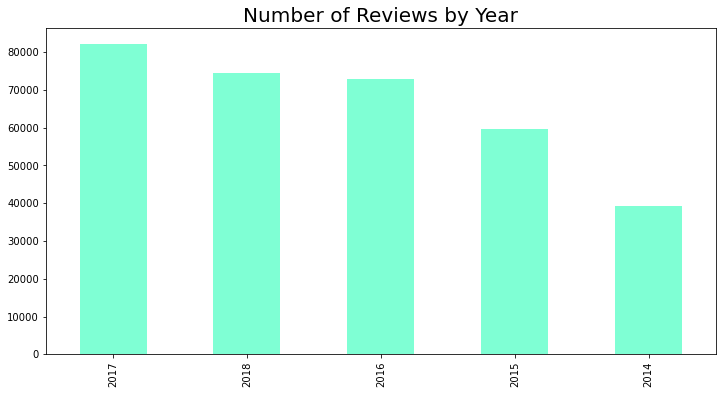

In [24]:
pltp.subplots(figsize=(12,6));
reviews_by_year[0:5].plot(kind = 'bar', color= 'aquamarine')
pltp.title('Number of Reviews by Year', fontsize=20);
pltp.savefig('../Images/reviews_by_year.png')

In [25]:
GTA_clean = GTA_Top5[GTA_Top5['year'] >= 2014]

print(GTA_clean.shape)
GTA_clean.head(2)

(328594, 12)


,business_id,name,city,state,stars,attributes,categories,user_id,review_stars,text,review_counts,year
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",2K62MJ4CJ19L8Tp5pRfjfQ,3.0,My girlfriend and I went for dinner at Emerald...,134,2017
2,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",SuOLY03LW5ZcnynKhbTydA,3.0,"***No automatic doors, not baby friendly!*** I...",134,2016


In [26]:
GTA_clean.to_csv('../Data/GTA_cleaned.csv', index = False)

In [27]:
GTA_clean['text_word_count'] = GTA_clean['text'].str.split().map(len)
GTA_clean.head(2)

/var/folders/3p/bdw7d11x76q9r29tng0s109c0000gn/T/ipykernel_2962/2537043623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GTA_clean['text_word_count'] = GTA_clean['text'].str.split().map(len)


,business_id,name,city,state,stars,attributes,categories,user_id,review_stars,text,review_counts,year,text_word_count
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",2K62MJ4CJ19L8Tp5pRfjfQ,3.0,My girlfriend and I went for dinner at Emerald...,134,2017,242
2,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...",SuOLY03LW5ZcnynKhbTydA,3.0,"***No automatic doors, not baby friendly!*** I...",134,2016,43


In [28]:
GTA_clean.to_csv('../Data/GTA_updated.csv', index = False)